In [208]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [209]:
df_train = pd.read_csv('../Datasets/LinearRegressionDataset/train.csv')
df_test = pd.read_csv('../Datasets/LinearRegressionDataset/test.csv')

In [210]:
X_train = df_train['x'].values
y_train = df_train['y'].values.round(2)
X_test = df_test['x'].values
y_test = df_test['y'].values.round(2)
 

In [211]:
X_train_temp = []
y_train_temp = []
divideby = 100

for i in range(len(X_train)):
    #if X_train[i] not in X_train_temp:
    X_train_temp.append((X_train[i]/divideby))
    y_train_temp.append((y_train[i]/divideby))

for i in range(len(X_test)):
    #if X_test[i] not in X_train_temp:
    X_train_temp.append((X_test[i]/divideby))
    y_train_temp.append((y_test[i]/divideby))

X_train = X_train_temp
y_train = y_train_temp

In [212]:
X_train_temp = []
y_train_temp = []
for i in range(len(X_train)):
    if y_train[i] < 0.5:
        X_train_temp.append(X_train[i])
        y_train_temp.append(y_train[i])


X_train = X_train_temp
y_train = y_train_temp

In [213]:
amin, amax = min(X_train), max(X_train)
for i, val in enumerate(X_train):
    X_train[i] = (val-amin) / (amax-amin)

amin, amax = min(y_train), max(y_train)
for i, val in enumerate(X_train):
    y_train[i] = (val-amin) / (amax-amin)


In [214]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)


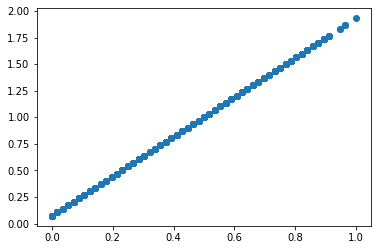

In [215]:
plt.scatter(X_train,y_train)
plt.show()

In [216]:
class Model(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,1)

    def forward(self,X):
        X = self.fc1(X)
        return X

In [217]:
model = Model()
model

Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

In [218]:
made_up_values = False

if made_up_values:
    x_values = [i for i in range(11)]
    x_train = np.array(x_values, dtype=np.float32)
    X_train = x_train.reshape(-1, 1)

    y_values = [2*i + 1 for i in x_values]
    y_train = np.array(y_values, dtype=np.float32)
    y_train = y_train.reshape(-1, 1)

In [219]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epochs = 5000
losses = []
losses_item = []
x_train_val = []
y_pred_val = []
y_train_val = []

for i in range(epochs):
    i += 1
    arr = np.arange(X_train.size)
    np.random.shuffle(arr)
    X_train_temp = []
    y_train_temp = []
    for index in arr:
        X_train_temp.append(X_train[index])
        y_train_temp.append(y_train[index])
    X_train = np.array(X_train_temp)
    y_train = np.array(y_train_temp)
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    inputs = torch.nan_to_num(inputs)
    labels = torch.nan_to_num(labels)
    optimizer.zero_grad()
    y_pred = model(inputs.float())
    loss = criterion(y_pred, labels.float())
    losses_item.append(loss.item())
    loss.backward()
    optimizer.step()
    if (i+1) == epochs:
        x_train_val = inputs
        y_pred_val = y_pred
        y_train_val = labels
    if i%100 == 0:
        print(f'epochs: {i}  loss: {loss.item():.4f}')

epochs: 100  loss: 2.4996
epochs: 200  loss: 1.6388
epochs: 300  loss: 1.1094
epochs: 400  loss: 0.7830
epochs: 500  loss: 0.5808
epochs: 600  loss: 0.4548
epochs: 700  loss: 0.3754
epochs: 800  loss: 0.3247
epochs: 900  loss: 0.2915
epochs: 1000  loss: 0.2692
epochs: 1100  loss: 0.2535
epochs: 1200  loss: 0.2419
epochs: 1300  loss: 0.2329
epochs: 1400  loss: 0.2255
epochs: 1500  loss: 0.2191
epochs: 1600  loss: 0.2134
epochs: 1700  loss: 0.2082
epochs: 1800  loss: 0.2033
epochs: 1900  loss: 0.1986
epochs: 2000  loss: 0.1940
epochs: 2100  loss: 0.1897
epochs: 2200  loss: 0.1854
epochs: 2300  loss: 0.1813
epochs: 2400  loss: 0.1772
epochs: 2500  loss: 0.1733
epochs: 2600  loss: 0.1694
epochs: 2700  loss: 0.1657
epochs: 2800  loss: 0.1620
epochs: 2900  loss: 0.1584
epochs: 3000  loss: 0.1549
epochs: 3100  loss: 0.1515
epochs: 3200  loss: 0.1481
epochs: 3300  loss: 0.1448
epochs: 3400  loss: 0.1416
epochs: 3500  loss: 0.1385
epochs: 3600  loss: 0.1354
epochs: 3700  loss: 0.1324
epochs: 38

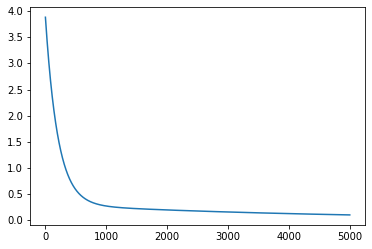

In [220]:
plt.plot(range(epochs),losses_item)
plt.show()

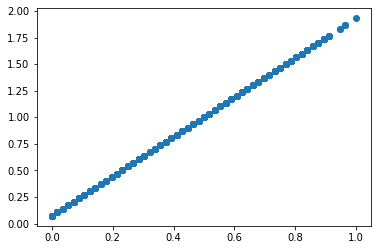

In [221]:
plt.scatter(x_train_val,y_train_val)
plt.show()

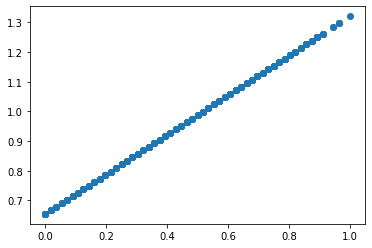

In [222]:
plt.scatter(x_train_val,y_pred_val.detach().numpy())
plt.show()